In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading dataset file
df = pd.read_csv("movie (1).csv")
df.head()

,Genre,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M,Year of Release
0,Horror,125,5.0,3968,74.348337,31.356476,2020
1,Romance,84,9.8,8150,28.243154,212.016126,2013
2,SciFi,75,2.0,1040,164.601429,129.342033,2017
3,Action,68,7.9,6250,38.779734,424.519154,2019
4,Thriller,6,4.7,8356,102.752477,16.652313,2012


In [4]:
# Checking dataset size
dataset_size = df.shape
dataset_size

(101, 7)

In [5]:
# Question 1
print("These are the quantative datasets:\n\n", df.columns[1:6])
print("\n\nThese are the qualatitive dataset:\n\n", df.columns[:1])

These are the quantative datasets:

 Index(['Rotten Tomatoes', 'IMDB', 'Audience Ratings', 'Budget_M',
       'Sales Revenue_M'],
      dtype='object')


These are the qualatitive dataset:

 Index(['Genre'], dtype='object')


In [6]:
# Question 2
df.describe()

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
count,101.000000,101.000000,101.000000,101.000000,96.000000
mean,53.554455,5.562376,5272.663366,5456.333862,239.422768
std,33.764323,2.608864,2891.578546,25371.661518,156.248835
min,0.000000,1.100000,437.000000,3.274064,6.018111
25%,26.000000,3.300000,2711.000000,48.764034,118.330717
50%,52.000000,5.400000,5410.000000,92.511321,208.085811
75%,77.000000,7.700000,7734.000000,155.704105,379.441128
max,142.000000,9.900000,9882.000000,160159.381000,497.200395


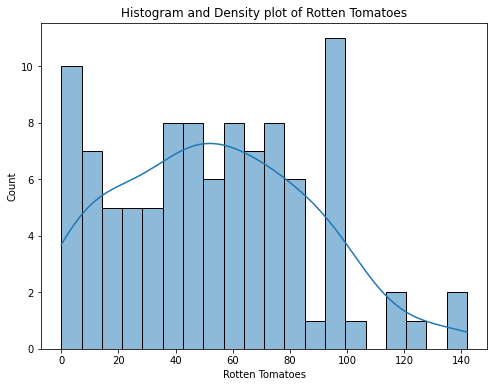

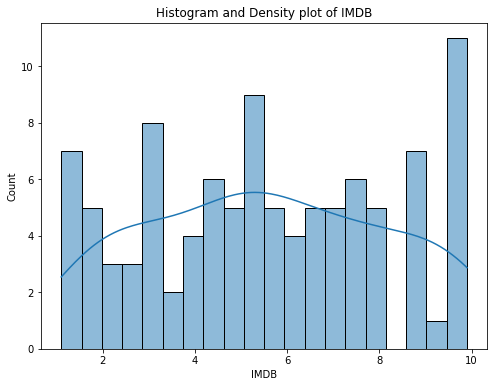

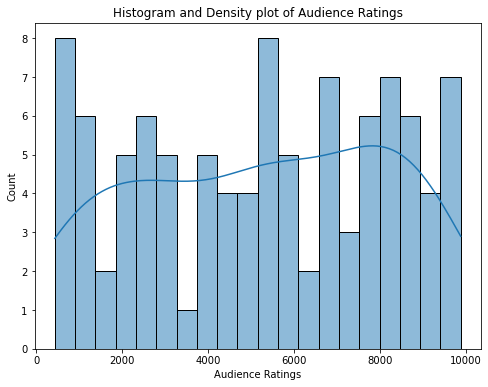

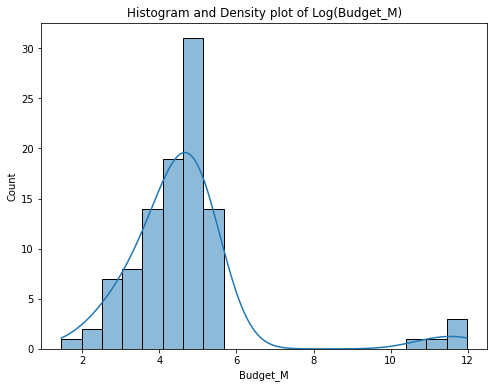

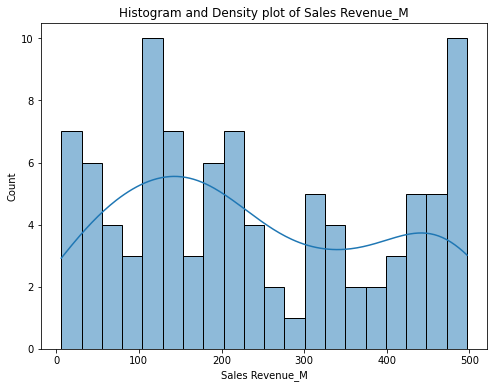

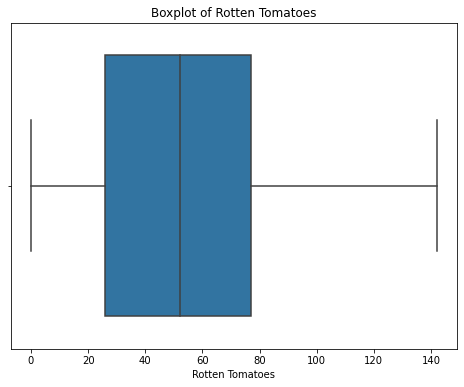

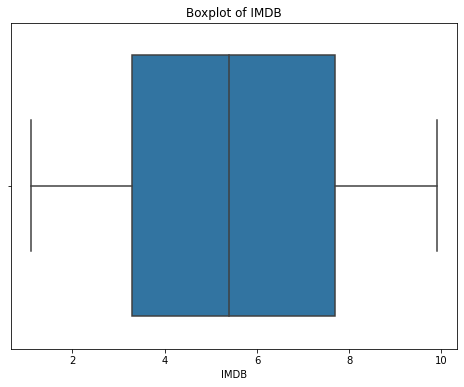

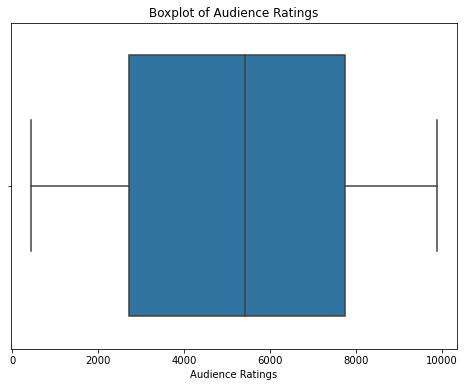

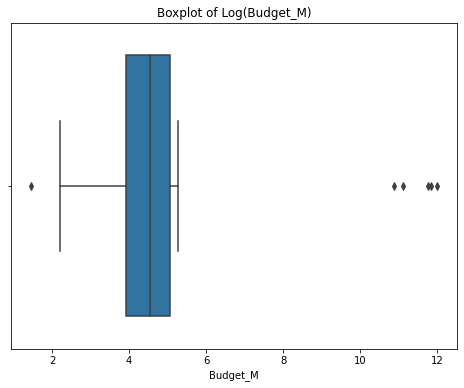

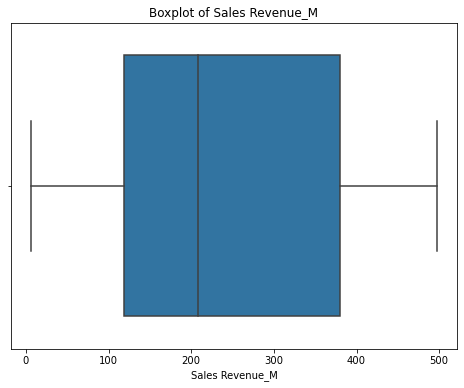

Histogram and density plot of Rotten Tomatoes: right-skewed distribution
Histogram and density plot of IMDB: Normal distribution 
Histogram and density plot of audience ratings: Normal distrbution 
Histogram and density plot of plot of Budget_M: Right Skewed


In [7]:
# Question 3

df_cleaned = df.dropna()


for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    
    if col == 'Budget_M':
        # Applied log transformation to 'Budget_M as the scale kept forming a singular pillar'
        sns.histplot(np.log1p(df[col]), bins=20, kde=True)
        plt.title(f"Histogram and Density plot of Log({col})")
    else:
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f"Histogram and Density plot of {col}")

    plt.show()

for col in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    
    if col == 'Budget_M':
        # Apply log transformation only to 'Budget_M' as the scale was off and didn't form a proper boxplot
        sns.boxplot(x=np.log1p(df[col]))
        plt.title(f"Boxplot of Log({col})")
    else:
        sns.boxplot(x=df[col])
        plt.title(f"Boxplot of {col}")

    plt.show()
    
print("Histogram and density plot of Rotten Tomatoes: right-skewed distribution\nHistogram and density plot of IMDB: Normal distribution \nHistogram and density plot of audience ratings: Normal distrbution \nHistogram and density plot of plot of Budget_M: Right Skewed")

In [8]:
#Question 4
print("'Audience Ratings' has the highest variability in the dataset due to its large dispersion in boxplot and low height of histogram plot")

'Audience Ratings' has the highest variability in the dataset due to its large dispersion in boxplot and low height of histogram plot


In [9]:
#Question 5

Correlation_matrix = df.corr()
Correlation_matrix

,Rotten Tomatoes,IMDB,Audience Ratings,Budget_M,Sales Revenue_M
Rotten Tomatoes,1.000000,-0.010546,-0.126204,-0.051246,-0.122929
IMDB,-0.010546,1.000000,0.126555,-0.053704,-0.041741
Audience Ratings,-0.126204,0.126555,1.000000,-0.111453,-0.011118
Budget_M,-0.051246,-0.053704,-0.111453,1.000000,0.030309
Sales Revenue_M,-0.122929,-0.041741,-0.011118,0.030309,1.000000


In [10]:
#Question 5
print(" 'Rotten Tomatoes' has the strongest correlation to 'Sales Revenue' with a correlation of -0.122\n'Budget' is the only independent variable with a positive correlation ro 'Sales Revenue' of 0.0303\nSince correlation 0.0303 is close to 0, it can indicate that there is a very weak or no linear relationship, so it'll be unlikely a higher budget will account for higher sales revenue but most likely won't.")

 'Rotten Tomatoes' has the strongest correlation to 'Sales Revenue' with a correlation of -0.122
'Budget' is the only independent variable with a positive correlation ro 'Sales Revenue' of 0.0303
Since correlation 0.0303 is close to 0, it can indicate that there is a very weak or no linear relationship, so it'll be unlikely a higher budget will account for higher sales revenue but most likely won't.


In [11]:
# Question 6

df['Genre'] = df['Genre'].replace('Scifi', 'Sci-fi')
df['Genre'] = df['Genre'].str.lower()

Genre_counts = df['Genre'].value_counts()

(Genre_counts)


action         16
romance        15
thriller       15
comedy         15
horror         10
drama           9
documentary     9
sci-fi          7
scifi           5
Name: Genre, dtype: int64

In [12]:
#Question 6
Highest_avg_sales_genre = df.groupby('Genre')['Sales Revenue_M'].mean().idxmax()
print(f"The genre with the highest average sales revenue is '{Highest_avg_sales_genre}'.")

The genre with the highest average sales revenue is 'comedy'.


In [13]:
#Question 7 

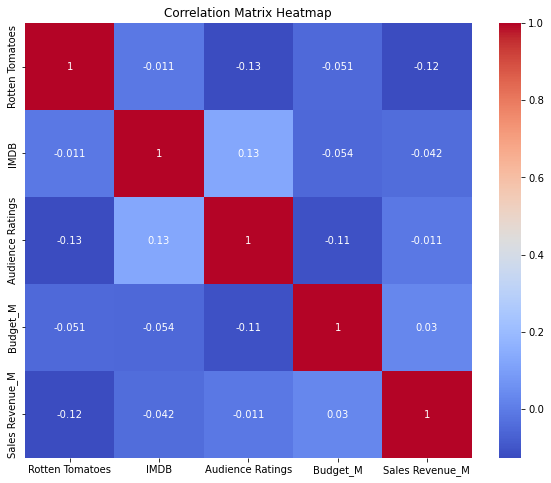

In [14]:
plt.figure(figsize=(10,8))

sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

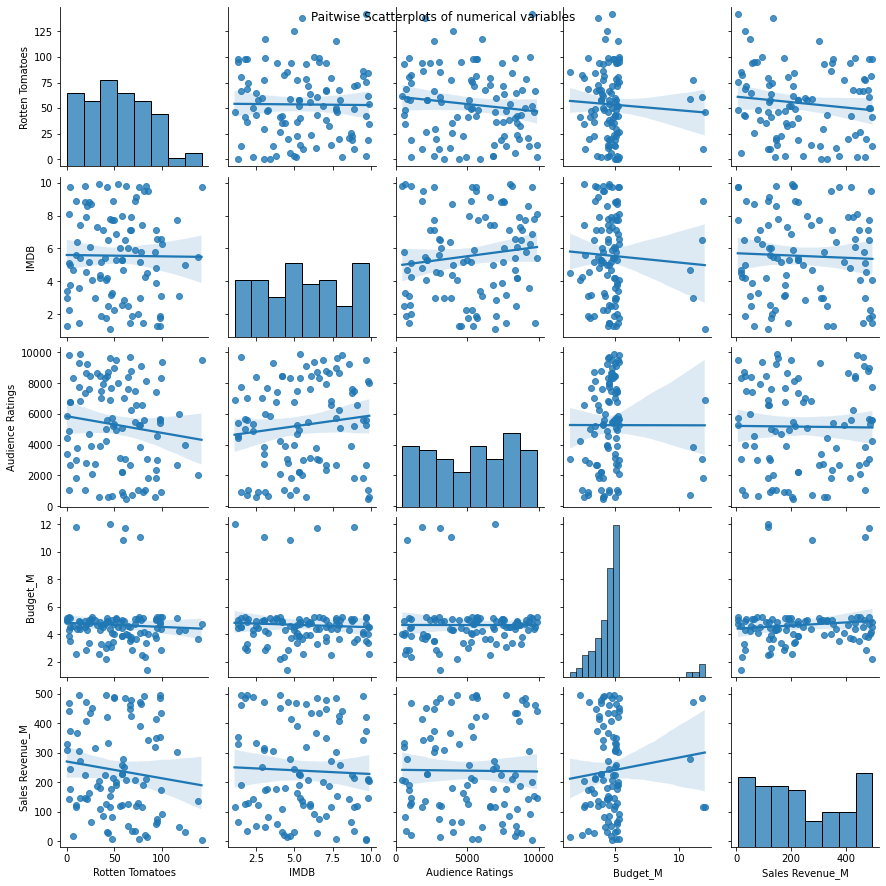

In [16]:
#Question 8

df['Budget_M'] = np.log1p(df['Budget_M'])

sns.pairplot(df.select_dtypes(include=['number']), kind='reg')
plt.suptitle("Paitwise Scatterplots of numerical variables")
plt.show()

In [24]:
#Question 9
Missing_Values = pd.DataFrame.isnull(df)
print(pd.DataFrame.sum(Missing_Values))


Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     5
Year of Release     0
dtype: int64


In [30]:
Dropping_Missing_values = df.dropna( )

print(pd.DataFrame.sum(pd.DataFrame.isnull(Dropping_Missing_values)))

Genre               0
Rotten Tomatoes     0
IMDB                0
Audience Ratings    0
Budget_M            0
Sales Revenue_M     0
Year of Release     0
dtype: int64


In [ ]:
#Question 10
